#Задача: тестирование качества работы модели машинного обучения

Сначала сделаем необходимый импорт.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Создание трех линейных датасетов для обучения модели

## 1-й датасет (на котором и будем обучать)

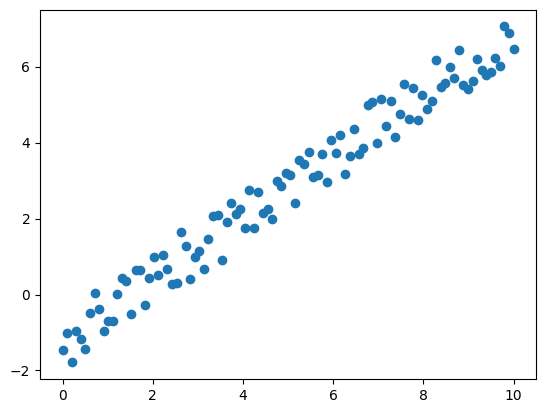

In [27]:
x1 = np.linspace(0,10,100)
y1 = 0.82 * x1 + np.random.random(100)*1.5 - 2

plt.scatter(x1, y1)
plt.show()

##2-й датасет

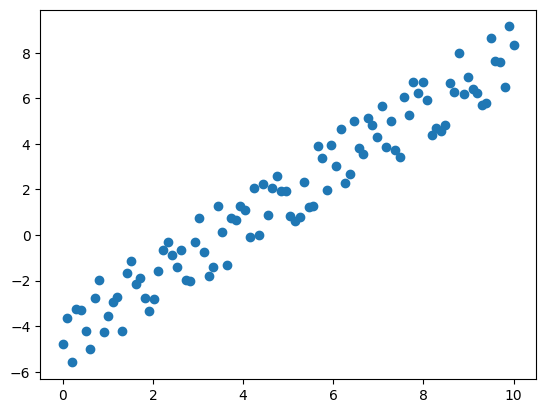

In [28]:
x2 = np.linspace(0,10,100)
y2 = 1.25 * x2 + np.random.random(100)*3.1 - 6

plt.scatter(x2, y2)
plt.show()

## 3-й датасет

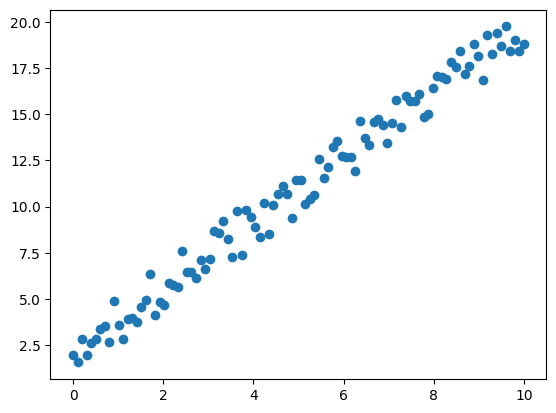

In [29]:
x3 = np.linspace(0,10,100)
y3 = 1.75 * x3 + np.random.random(100)*2.7 + 0.8


plt.scatter(x3, y3)
plt.show()

#Создаем датасет с шумом (модифицируем 3-й датасет)

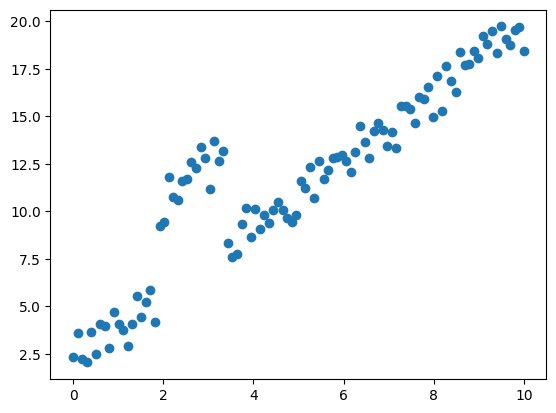

In [30]:
x_noise = np.linspace(0,10,100)
y_noise = 1.75 * x_noise + np.random.random(100)*2.7 + 0.8
y_noise[19:34]+=5

plt.scatter(x_noise, y_noise)
plt.show()

# Обучаем линейную регрессию

In [31]:
regr = LinearRegression()
regr.fit(x1.reshape(-1,1), y1)

pred1 = regr.predict(x1.reshape(-1,1))

print("MSE: %.2f" % mean_squared_error(y1, pred1))
print("R2: %.2f" % r2_score(y1, pred1))
print("Coefficients: ", regr.coef_)

MSE: 0.19
R2: 0.97
Coefficients:  [0.79266289]


Визуализируем

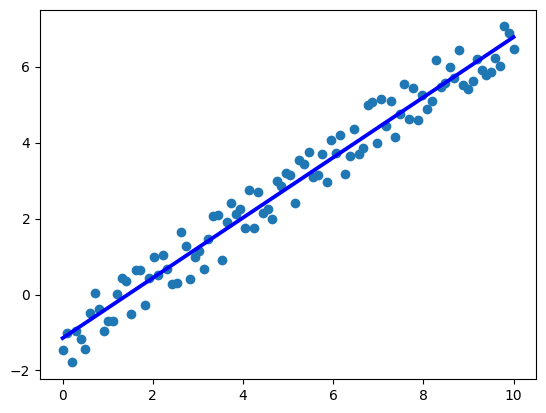

In [32]:
plt.scatter(x1, y1)
plt.plot(x1.reshape(-1, 1), pred1, color="blue", linewidth=2.75)
plt.show()
np.savetxt("y1.csv", y1, delimiter=",")
np.savetxt("pred1.csv", pred1, delimiter=",")

##Теперь сгенерируем предсказания для всех остальных датасетов, включая зашумленный, после чего сохраним вместе со значениями целевых переменных.

In [33]:
pred2 = regr.predict(x2.reshape(-1,1))
pred3 = regr.predict(x3.reshape(-1,1))
pred_noise = regr.predict(x_noise.reshape(-1,1))

np.savetxt("y2.csv", y2, delimiter=",")
np.savetxt("pred2.csv", pred2, delimiter=",")

np.savetxt("y3.csv", y3, delimiter=",")
np.savetxt("pred3.csv", pred3, delimiter=",")

np.savetxt("y_noise.csv", y_noise, delimiter=",")
np.savetxt("pred_noise.csv", pred_noise, delimiter=",")

#Теперь напишем тесты для проверки модели на всех датасетах и выполним их через pytest

In [34]:
%%writefile test_metrics.py
import pytest
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

@pytest.fixture()
def load_y1():
    y1 = np.loadtxt("y1.csv", delimiter=",")
    return(y1)

@pytest.fixture()
def load_pred1():
    pred1 = np.loadtxt("pred1.csv", delimiter=",")
    return(pred1)

@pytest.fixture()
def load_y2():
    y2 = np.loadtxt("y2.csv", delimiter=",")
    return(y2)

@pytest.fixture()
def load_pred2():
    pred2 = np.loadtxt("pred2.csv", delimiter=",")
    return(pred2)

@pytest.fixture()
def load_y3():
    y3 = np.loadtxt("y3.csv", delimiter=",")
    return(y3)

@pytest.fixture()
def load_pred3():
    pred3 = np.loadtxt("pred3.csv", delimiter=",")
    return(pred3)

@pytest.fixture()
def load_y_noise():
    y_noise = np.loadtxt("y_noise.csv", delimiter=",")
    return(y_noise)

@pytest.fixture()
def load_pred_noise():
    pred_noise = np.loadtxt("pred_noise.csv", delimiter=",")
    return(pred_noise)



def test_mse_1(load_y1, load_pred1):
    assert mean_squared_error(load_y1, load_pred1) < 1

def test_r2_1(load_y1, load_pred1):
    assert r2_score(load_y1, load_pred1) > 0.9

def test_mse_2(load_y2, load_pred2):
    assert mean_squared_error(load_y2, load_pred2) < 1

def test_r2_2(load_y2, load_pred2):
    assert r2_score(load_y2, load_pred2) > 0.9

def test_mse_3(load_y3, load_pred3):
    assert mean_squared_error(load_y3, load_pred3) < 1

def test_r2_3(load_y3, load_pred3):
    assert r2_score(load_y3, load_pred3) > 0.9

def test_mse_noise(load_y_noise, load_pred_noise):
    print("Now we will test on data with noise") #Чтобы было понятно, где метрики по шуму
    assert mean_squared_error(load_y_noise, load_pred_noise) < 1

def test_r2_noise(load_y_noise, load_pred_noise):
    print("Now we will test on data with noise") #Чтобы было понятно, где метрики по шуму
    assert r2_score(load_y_noise, load_pred_noise) > 0.9

Overwriting test_metrics.py


In [35]:
!pytest -v test_metrics.py

============================= test session starts ==============================
platform linux -- Python 3.10.11, pytest-7.2.2, pluggy-1.0.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.6.2
collected 8 items                                                              

test_metrics.py::test_mse_1 PASSED                                       [ 12%]
test_metrics.py::test_r2_1 PASSED                                        [ 25%]
test_metrics.py::test_mse_2 FAILED                                       [ 37%]
test_metrics.py::test_r2_2 FAILED                                        [ 50%]
test_metrics.py::test_mse_3 FAILED                                       [ 62%]
test_metrics.py::test_r2_3 FAILED                                        [ 75%]
test_metrics.py::test_mse_noise FAILED                                   [ 87%]
test_metrics.py::test_r2_noise FAILED                                    [100%]

=================================== FAILURES ========

#Выводы

Как видим, тесты модель прошла лишь на том датасете, на котором обучалась. Однако особо высокие значения средвеквадратической ошибки  мы наблюдаем на датасете с шумами - test_mse_noise равна 87.61212083660926. Также на датасете с шумами видим самое большое отклонение от заранее определенного допустимого значения коэффициента детерминации (test_r2_noise равна -2.6593937920282267). На третьем датасете модель тоже очень слабо себя проявляет, однако важно отметить, третий датасет отличается от последнего только шумом, в связи с чем мы можем определенно сказать, что шум сам по себе очень негативно сказывается на точности линейной регрессии. Остальная же часть ошибки, вероятно, связана с разными масштабами датасетов, что может быть преодолено средствами стандартизации.